In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , mean_squared_error

In [244]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/stress/SaYoPillow - Copy.csv')

In [245]:
df.head()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [246]:
df.describe()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
count,630.000000,630.000000,614.000000,618.000000,626.000000,612.000000,619.000000,606.000000,630.000000
mean,71.600000,21.916314,93.472055,11.945188,91.047920,88.964673,3.835742,64.901733,2.000000
std,19.372833,4.336242,6.833370,5.001250,4.891833,13.480426,3.341316,11.260908,1.415337
min,45.000000,16.000000,85.000000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.580000,8.516000,88.484000,81.230000,0.472000,56.210000,1.000000
50%,70.000000,21.016000,93.080000,11.048000,91.000000,90.080000,3.608000,62.540000,2.000000
75%,91.250000,25.064000,95.596000,15.950000,94.274000,98.890000,6.592000,72.740000,3.000000
max,100.000000,48.560000,166.230000,46.800000,154.300000,185.360000,20.220000,158.650000,4.000000


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring range     630 non-null    float64
 1   respiration rate  630 non-null    float64
 2   body temperature  614 non-null    float64
 3   limb movement     618 non-null    float64
 4   blood oxygen      626 non-null    float64
 5   eye movement      612 non-null    float64
 6   hours of sleep    619 non-null    float64
 7   heart rate        606 non-null    float64
 8   Stress Levels     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [248]:
df.isnull().sum()

snoring range        0
respiration rate     0
body temperature    16
limb movement       12
blood oxygen         4
eye movement        18
hours of sleep      11
heart rate          24
Stress Levels        0
dtype: int64

Pre-Processing

<Axes: >

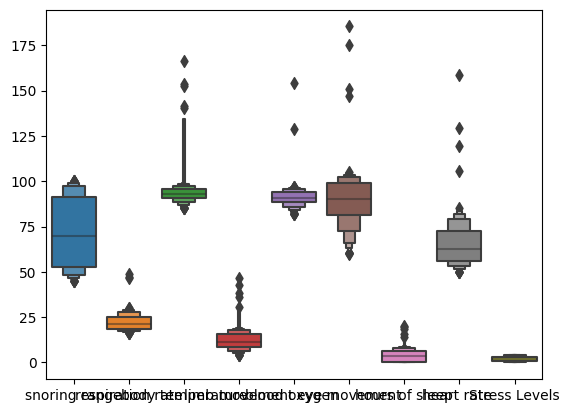

In [249]:
sns.boxenplot(df)

In [250]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-(1.5*IQR))
upper_bound = (Q3+(1.5*IQR))

In [251]:
print(df[df>upper_bound].count())
print(df[df<lower_bound].count())

snoring range       0
respiration rate    3
body temperature    8
limb movement       6
blood oxygen        2
eye movement        4
hours of sleep      3
heart rate          4
Stress Levels       0
dtype: int64
snoring range       0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
hours of sleep      0
heart rate          0
Stress Levels       0
dtype: int64


In [252]:
from numpy.core.multiarray import dtype
df = df[df<upper_bound].dropna()
df = df[df>lower_bound].dropna()
print(df)

     snoring range  respiration rate  body temperature  limb movement  \
0           93.800            25.680            91.840         16.600   
1           91.640            25.104            91.552         15.880   
2           60.000            20.000            96.000         10.000   
3           85.760            23.536            90.768         13.920   
4           48.120            17.248            97.872          6.496   
..             ...               ...               ...            ...   
624         58.800            19.760            95.760          9.760   
626         48.440            17.376            98.064          6.752   
627         97.504            27.504            86.880         17.752   
628         58.640            19.728            95.728          9.728   
629         73.920            21.392            93.392         11.392   

     blood oxygen   eye movement  hours of sleep  heart rate   Stress Levels  
0           89.840         99.60           1

In [253]:
print(df[df>upper_bound].count())
print(df[df<lower_bound].count())

snoring range       0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
hours of sleep      0
heart rate          0
Stress Levels       0
dtype: int64
snoring range       0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
hours of sleep      0
heart rate          0
Stress Levels       0
dtype: int64


In [254]:
df.isna().sum()

snoring range       0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
hours of sleep      0
heart rate          0
Stress Levels       0
dtype: int64

In [255]:
#from numpy.core.fromnumeric import shape
#scaler = MaxAbsScaler()
#df_scaled = scaler.fit_transform(df[df.columns[1]])
#df_scaled = pd.DataFrame(df_scaled,columns=df.columns[1:7])
#df_scaled['Stress Levels'] = df['Stress Levels']
#df_scaled
#print(df_scaled)
#print(df['Stress Levels'])

<Axes: >

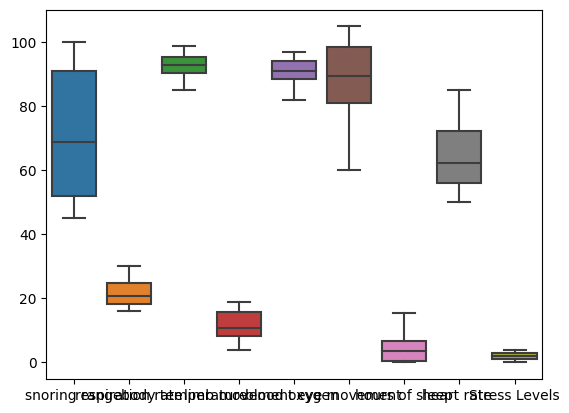

In [256]:
sns.boxplot(df)

Graph Representation

array([[<Axes: title={'center': 'snoring range'}>,
        <Axes: title={'center': 'respiration rate'}>,
        <Axes: title={'center': 'body temperature'}>],
       [<Axes: title={'center': 'limb movement'}>,
        <Axes: title={'center': 'blood oxygen '}>,
        <Axes: title={'center': 'eye movement'}>],
       [<Axes: title={'center': 'hours of sleep'}>,
        <Axes: title={'center': 'heart rate '}>,
        <Axes: title={'center': 'Stress Levels'}>]], dtype=object)

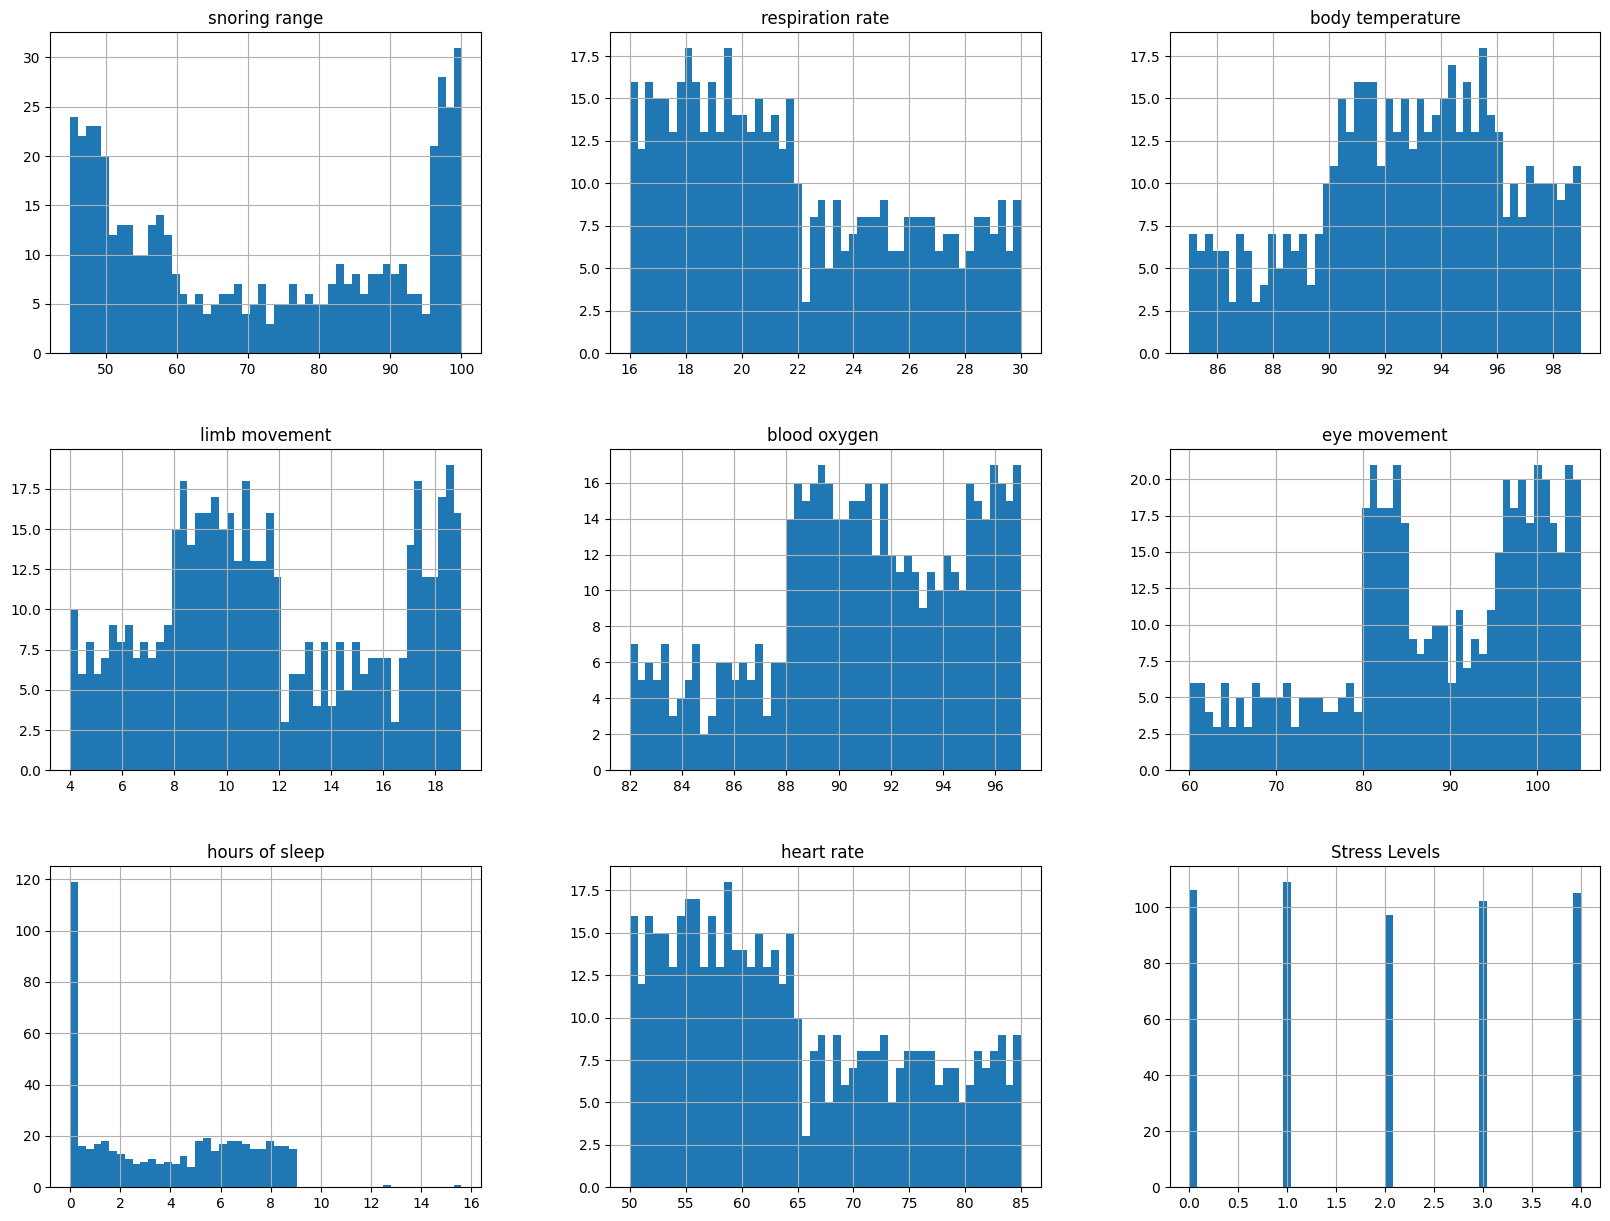

In [257]:
df.hist(bins=50,figsize=(20,15))

In [258]:
corr_matrix = df.corr()
corr_matrix['Stress Levels'].sort_values(ascending=False)

Stress Levels       1.000000
snoring range       0.976336
respiration rate    0.964192
heart rate          0.964192
limb movement       0.963807
eye movement        0.952335
hours of sleep     -0.947360
blood oxygen       -0.959897
body temperature   -0.961437
Name: Stress Levels, dtype: float64

array([[<Axes: xlabel='Stress Levels', ylabel='Stress Levels'>,
        <Axes: xlabel='snoring range', ylabel='Stress Levels'>,
        <Axes: xlabel='limb movement', ylabel='Stress Levels'>,
        <Axes: xlabel='respiration rate', ylabel='Stress Levels'>,
        <Axes: xlabel='eye movement', ylabel='Stress Levels'>,
        <Axes: xlabel='body temperature', ylabel='Stress Levels'>,
        <Axes: xlabel='hours of sleep', ylabel='Stress Levels'>],
       [<Axes: xlabel='Stress Levels', ylabel='snoring range'>,
        <Axes: xlabel='snoring range', ylabel='snoring range'>,
        <Axes: xlabel='limb movement', ylabel='snoring range'>,
        <Axes: xlabel='respiration rate', ylabel='snoring range'>,
        <Axes: xlabel='eye movement', ylabel='snoring range'>,
        <Axes: xlabel='body temperature', ylabel='snoring range'>,
        <Axes: xlabel='hours of sleep', ylabel='snoring range'>],
       [<Axes: xlabel='Stress Levels', ylabel='limb movement'>,
        <Axes: xlabel='sno

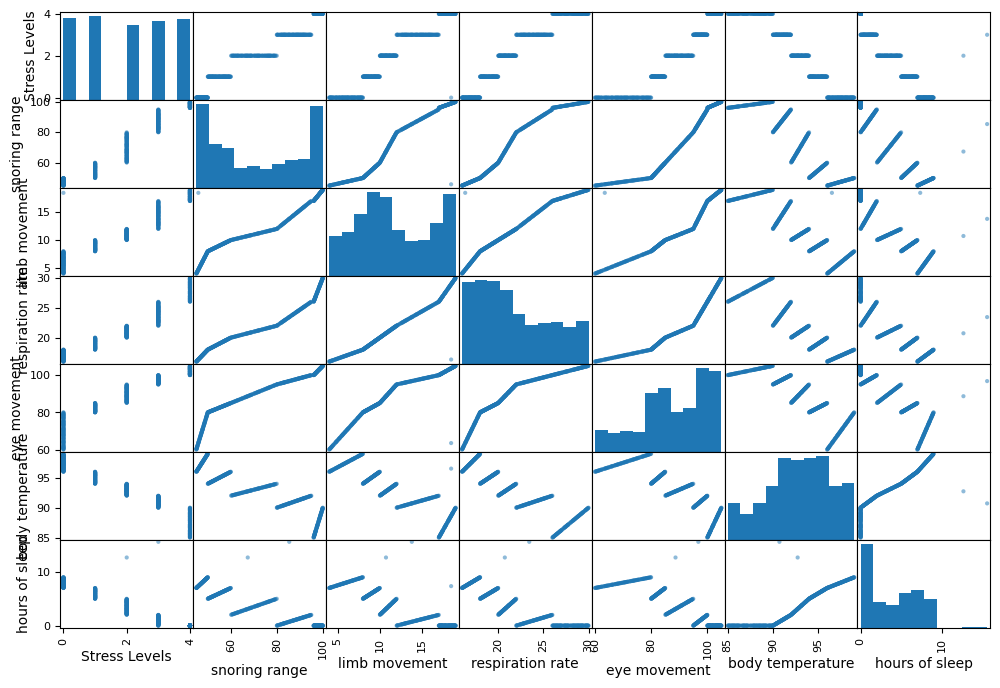

In [259]:
attributes = ['Stress Levels','snoring range','limb movement','respiration rate','eye movement','body temperature','hours of sleep']
scatter_matrix(df[attributes],figsize=(12,8))

<Axes: xlabel='Stress Levels', ylabel='limb movement'>

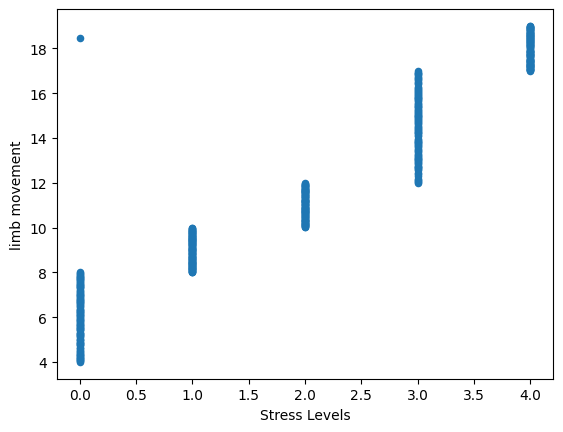

In [260]:
df.plot(kind="scatter",x='Stress Levels',y='limb movement')

In [261]:
X = df.drop(columns='Stress Levels',axis=1)
Y = df['Stress Levels']

In [262]:
print(X)

     snoring range  respiration rate  body temperature  limb movement  \
0           93.800            25.680            91.840         16.600   
1           91.640            25.104            91.552         15.880   
2           60.000            20.000            96.000         10.000   
3           85.760            23.536            90.768         13.920   
4           48.120            17.248            97.872          6.496   
..             ...               ...               ...            ...   
624         58.800            19.760            95.760          9.760   
626         48.440            17.376            98.064          6.752   
627         97.504            27.504            86.880         17.752   
628         58.640            19.728            95.728          9.728   
629         73.920            21.392            93.392         11.392   

     blood oxygen   eye movement  hours of sleep  heart rate   
0           89.840         99.60           1.840        74.

In [263]:
print(Y)

0      3
1      3
2      1
3      3
4      0
      ..
624    1
626    0
627    4
628    1
629    2
Name: Stress Levels, Length: 519, dtype: int64


In [264]:
Y.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
624    False
626    False
627    False
628    False
629    False
Name: Stress Levels, Length: 519, dtype: bool

Splitting Data

In [265]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape is",X_train.shape)
print("X_test shape is",X_test.shape)
print("Y_train shape is",Y_train.shape)
print("Y_test shape is",Y_test.shape)

X_train shape is (415, 8)
X_test shape is (104, 8)
Y_train shape is (415,)
Y_test shape is (104,)


Model Trining

In [266]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [267]:
prediction = np.round(model.predict(X_test))
accu = accuracy_score(Y_test,prediction)
print(prediction)
print(accu)

[0 4 0 3 4 4 2 1 4 2 0 1 3 3 2 2 4 4 0 4 1 4 2 3 3 0 2 4 3 2 3 3 3 1 1 2 3
 1 1 3 2 1 1 1 2 0 3 3 3 4 4 4 2 3 1 2 3 4 1 4 0 0 2 3 3 4 3 1 0 0 3 0 3 1
 2 2 2 1 1 2 0 2 1 4 0 0 1 0 1 3 1 3 1 0 0 1 4 2 2 1 0 4 2 0]
0.9903846153846154
